# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
x_train.shape[1:]

(3072,)

In [7]:
def build_mlp(input_shape, output_unit=10,num_nur=[512,256,128] ):
    input_layer=keras.layers.Input(input_shape)
    
    for n,i in enumerate(num_nur):
        if n==0:
            x=keras.layers.Dense(units=i, activation='relu', name='hidden_layer'+str(n+1))(input_layer)
        else:
            x=keras.layers.Dense(units=i, activation='relu', name='hidden_layer'+str(n+1))(x)
    
    out=keras.layers.Dense(units=output_unit, activation='softmax', name='output')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [8]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [22]:
results = {}
for lr in LEARNING_RATE:
    SGD=keras.optimizers.SGD(learning_rate=lr,momentum=MOMENTUM)
    RMSP=keras.optimizers.RMSprop(learning_rate=lr,rho=0.9)
    AdaG=keras.optimizers.Adagrad(learning_rate=lr)
    Adam=keras.optimizers.Adam(learning_rate=lr)
    optimizer=[SGD,RMSP,AdaG,Adam]
    for opt in optimizer:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR={}, and optimazer={}".format(lr,opt))
        model=build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)
        
        model.fit(x_train,y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test,y_test),
                  shuffle=True)
        
        
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "exp_lr{}_opt{}".format(lr,opt)
        results[exp_name_tag]={'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

Experiment with LR=0.1, and optimazer=<keras.optimizers.SGD object at 0x63bfbae90>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate

50000/50000 [==============================] - 7s 133us/step - loss: 1.8982 - accuracy: 0.2731 - val_loss: 1.9408 - val_accuracy: 0.2696
Epoch 49/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.8887 - accuracy: 0.2764 - val_loss: 1.9164 - val_accuracy: 0.2702
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.9304 - accuracy: 0.2678 - val_loss: 1.9521 - val_accuracy: 0.2616
Experiment with LR=0.1, and optimazer=<keras.optimizers.RMSprop object at 0x63bab8550>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    

50000/50000 [==============================] - 9s 173us/step - loss: 2.3078 - accuracy: 0.1003 - val_loss: 2.3183 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.3083 - accuracy: 0.0989 - val_loss: 2.3096 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.3075 - accuracy: 0.1006 - val_loss: 2.3163 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.3080 - accuracy: 0.1001 - val_loss: 2.3118 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 9s 174us/step - loss: 2.3076 - accuracy: 0.1020 - val_loss: 2.3129 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 9s 173us/step - loss: 2.3080 - accuracy: 0.1005 - val_loss: 2.3122 - val_accuracy: 0.1000
Experiment with LR=0.1, and optimazer=<keras.optimizers.Adagrad object at 0x63bab8890>
Model: "model_1"
____________

50000/50000 [==============================] - 8s 169us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 9s 171us/step - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.3027 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 9s 170us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 9s 170us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 8s 170us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss:

50000/50000 [==============================] - 10s 194us/step - loss: 2.3067 - accuracy: 0.1011 - val_loss: 2.3091 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.3076 - accuracy: 0.0986 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.3060 - accuracy: 0.1009 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 9s 182us/step - loss: 2.3068 - accuracy: 0.0994 - val_loss: 2.3074 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.3067 - accuracy: 0.0990 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.3070 - accuracy: 0.0994 - val_loss: 2.3086 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.3076 - accuracy: 0.0995 - val_l

50000/50000 [==============================] - 7s 135us/step - loss: 1.1199 - accuracy: 0.6048 - val_loss: 1.3230 - val_accuracy: 0.5313
Epoch 37/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.1080 - accuracy: 0.6095 - val_loss: 1.3665 - val_accuracy: 0.5221
Epoch 38/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.0913 - accuracy: 0.6162 - val_loss: 1.3463 - val_accuracy: 0.5290
Epoch 39/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0740 - accuracy: 0.6205 - val_loss: 1.3319 - val_accuracy: 0.5296
Epoch 40/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.0673 - accuracy: 0.6229 - val_loss: 1.3433 - val_accuracy: 0.5266
Epoch 41/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.0642 - accuracy: 0.6246 - val_loss: 1.3101 - val_accuracy: 0.5426
Epoch 42/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.0489 - accuracy: 0.6303 - val_loss:

50000/50000 [==============================] - 11s 226us/step - loss: 1.0178 - accuracy: 0.6341 - val_loss: 1.6940 - val_accuracy: 0.4863
Epoch 34/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.0053 - accuracy: 0.6393 - val_loss: 1.6370 - val_accuracy: 0.4972
Epoch 35/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.9913 - accuracy: 0.6437 - val_loss: 1.6997 - val_accuracy: 0.4782
Epoch 36/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.9751 - accuracy: 0.6479 - val_loss: 1.5974 - val_accuracy: 0.5001
Epoch 37/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.9645 - accuracy: 0.6520 - val_loss: 1.6858 - val_accuracy: 0.4679
Epoch 38/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.9462 - accuracy: 0.6591 - val_loss: 1.7566 - val_accuracy: 0.4658
Epoch 39/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.9366 - accuracy: 0.6632 - val_

50000/50000 [==============================] - 10s 196us/step - loss: 1.3457 - accuracy: 0.5327 - val_loss: 1.4192 - val_accuracy: 0.4955
Epoch 31/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.3391 - accuracy: 0.5341 - val_loss: 1.4397 - val_accuracy: 0.4843
Epoch 32/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.3333 - accuracy: 0.5348 - val_loss: 1.4222 - val_accuracy: 0.4986
Epoch 33/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.3269 - accuracy: 0.5381 - val_loss: 1.4381 - val_accuracy: 0.4871
Epoch 34/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.3219 - accuracy: 0.5412 - val_loss: 1.4118 - val_accuracy: 0.4921
Epoch 35/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.3166 - accuracy: 0.5426 - val_loss: 1.4436 - val_accuracy: 0.4895
Epoch 36/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.3119 - accuracy: 0.5432 - val_lo

50000/50000 [==============================] - 9s 186us/step - loss: 0.9972 - accuracy: 0.6472 - val_loss: 1.4306 - val_accuracy: 0.5177
Epoch 28/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.9821 - accuracy: 0.6496 - val_loss: 1.3889 - val_accuracy: 0.5307
Epoch 29/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.9653 - accuracy: 0.6555 - val_loss: 1.4036 - val_accuracy: 0.5297
Epoch 30/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.9389 - accuracy: 0.6641 - val_loss: 1.4229 - val_accuracy: 0.5246
Epoch 31/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.9183 - accuracy: 0.6718 - val_loss: 1.4359 - val_accuracy: 0.5322
Epoch 32/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.9039 - accuracy: 0.6768 - val_loss: 1.4266 - val_accuracy: 0.5305
Epoch 33/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.8920 - accuracy: 0.6802 - val_loss:

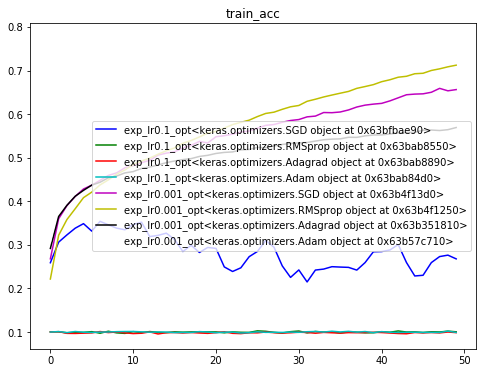

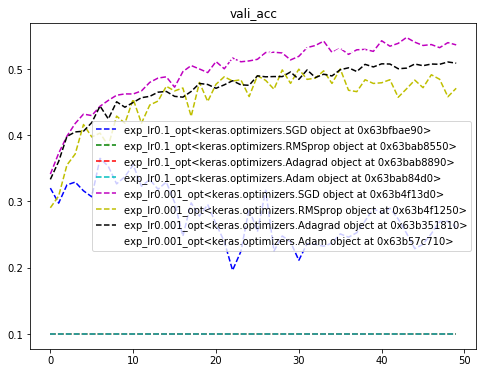

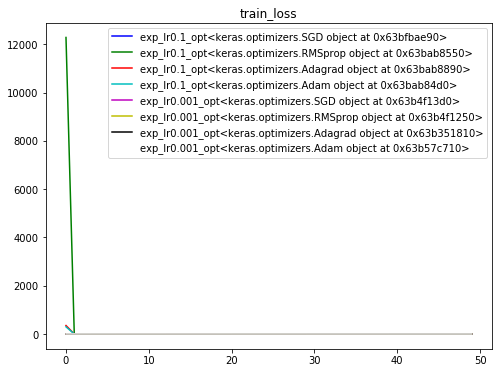

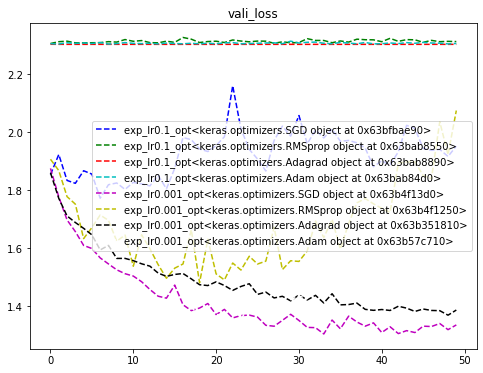

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.title("train_acc")
    plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("vali_acc")
    plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.title("train_loss")
    plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("vali_loss")
    plt.legend()
plt.show()



